In [1]:
import pandas as pd
import os
import pickle
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import math 

from sklearn.utils import safe_sqr
from sklearn.base import clone
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# import GEOparse
# import re

#Feature Select
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV, RFE
from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.linear_model import LassoCV, Lasso

from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.impute import KNNImputer
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesRegressor
import collections
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import KNNImputer
import glob
from scipy.stats import ttest_ind
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from scipy import stats
import random
import math
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest
from scipy import stats
from scipy.stats import wilcoxon
import pyBigWig
import pickle
from sklearn.linear_model import LinearRegression

from scipy.stats import ranksums
from scipy.stats import mannwhitneyu
from scipy.stats import binomtest
from scipy.stats import fisher_exact
from scipy.stats import ttest_ind

from random import sample 
from sklearn.metrics import mean_squared_error

In [102]:
import methylize

In [ ]:
# IDAT Processing
# python -m methylprep process -d ../IDAT/ --array_type mouse --all --no_sample_sheet

### New dependency (Zanes folder)

In [5]:
data_dir = '/cellar/users/zkoch/metallo_proj/data/'
out_dir = '/cellar/users/zkoch/metallo_proj/analysis_outputs'

In [8]:
methyl_df = pd.read_csv(os.path.join(data_dir,'beta_values.tsv'), sep = '\t')
# set IlmnID as index and transpose
methyl_df = methyl_df.set_index('IlmnID')
methyl_df = methyl_df.T
# remove index name
methyl_df.index.name = None

meta_df = pd.read_excel(os.path.join(data_dir, 'metadata.xlsx'))
# make 17th row the header#
meta_df.columns = meta_df.iloc[17]
# drop first 17 rows
meta_df = meta_df.drop(meta_df.index[0:18]).reset_index(drop=True)
meta_df['Sample Name'] = meta_df['Sample Name'].astype('str')
meta_df['Sample Name'] = meta_df['Sample Name'].replace(' ','_', regex=True)
meta_df = meta_df.set_index('Sample Name')

sample_sheet = pd.read_excel(os.path.join(data_dir, 'SampleSheet_Metallo_220722_fixed.xlsx'))
# drop first 6 rows
sample_sheet = sample_sheet.drop(sample_sheet.index[0:6]).reset_index(drop=True)
# make 1st row the header and drop first row
sample_sheet.columns = sample_sheet.iloc[0]
sample_sheet = sample_sheet.drop(sample_sheet.index[0]).reset_index(drop=True)
# set Sample Name as index
sample_sheet['Sample_Name'] = sample_sheet['Sample_Name'].astype(str)
sample_sheet = sample_sheet.set_index('Sample_Name', drop=True)
# combine sample_sheet and meta_df to allow pairing of methylation with metadata
meta_sample_df = meta_df.merge(sample_sheet, how='outer', left_index=True, right_index=True)

# merge meta_sample_df and methyl_df on 'IlmnID
meta_sample_df['IlmnID'] = meta_sample_df['Sentrix_ID'].astype(str) + '_' + meta_sample_df['Sentrix_Position'].astype(str)
# reset index and name the old index Sample
meta_sample_df = meta_sample_df.reset_index().rename(columns={'index':'sample_name'})
meta_sample_df = meta_sample_df.set_index('IlmnID')
# merge with methyl_df
methyl_df = methyl_df.merge(meta_sample_df['sample_name'], how='outer', left_index=True, right_index=True)
# set sample_name as index
methyl_df = methyl_df.set_index('sample_name', drop=True)

In [ ]:
# put metadata and methylation data rows in same order
meta_df = meta_df.reindex(methyl_df.index)

In [18]:
meta_df['Genetic background equated'] = meta_df['Genetic background'].replace('WT (C57BL/6J)', 'C57BL/6J')

In [27]:
X = methyl_GB_df.dropna(axis=1, how='any')
y = meta_GB_subset_df['Genetic background equated']

# train LogisticRegCV to predict age from methylation data
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

CV = KFold(n_splits = 5, shuffle = True, random_state = 0)

# create empty lists to store results
accuracy_scores = []
# mse_scores = []
# mae_scores = []
# iterate across folds
for train_index, test_index in CV.split(X):
    # split into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # fit model
    model = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
    # predict on test set
    y_pred = model.predict(X_test)
    # calculate scores
    accuracy_scores.append(accuracy_score(y_test, y_pred))


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X = methyl_df.dropna(axis=1, how='any')
y = meta_df['Diet ']


CV = KFold(n_splits = 5, shuffle = True, ) #random_state = 0

# create empty lists to store results
accuracy_scores = []
# mse_scores = []
# mae_scores = []
# iterate across folds
for train_index, test_index in CV.split(X):
    # split into train and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # fit model
    model = RandomForestClassifier().fit(X_train, y_train)
    # predict on test set
    y_pred = model.predict(X_test)
    # calculate scores
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    print('fold done')


fold done
fold done
fold done
fold done
fold done


In [41]:
accuracy_scores

[0.8, 0.6, 0.7, 0.8888888888888888, 0.7777777777777778]

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

X = methyl_df.dropna(axis=1, how='any')
y = meta_df['Age (months)']


CV = KFold(n_splits = 5, shuffle = True, ) #random_state = 0

# create empty lists to store results
r2_scores = []
model = LinearRegression().fit(X, y)
# predict on test set
y_pred = model.predict(X)
# calculate scores
r2_scores.append(r2_score(y, y_pred))


In [103]:
meta_GB_subset_df = meta_df[(meta_df['Diet '] == 'Regular chow')]
methyl_GB_df = methyl_df.loc[meta_GB_subset_df.index, :]


In [108]:
meta_df

17,Sample Code/Well ID,Gender,Conc (ng/ul),Volume (ul),Total ng,Quantification Method,Comment,NaN,Age (months),Diet,Gender,Genetic background,Genetic background equated
sample_name,,,,,,,,,,,,,
3A_L,D1,Male,84.2,25,2105,Nanodrop,NaN,NaN,19,Control amino acid,Male,C57BL/6J,C57BL/6J
3D_Rp,D7,Male,95,25,2375,Nanodrop,NaN,NaN,19,Control amino acid,Male,C57BL/6J,C57BL/6J
3A_RL,D2,Male,123.8,25,3095,Nanodrop,NaN,NaN,19,Control amino acid,Male,C57BL/6J,C57BL/6J
19B1,D8,Male,160.1,25,4002.5,Nanodrop,NaN,NaN,3,Control amino acid,Male,C57BL/6J,C57BL/6J
3A_Rp,D3,Male,71.6,25,1790.0,Nanodrop,NaN,NaN,19,Control amino acid,Male,C57BL/6J,C57BL/6J
19B2,D9,Male,138.2,25,3455.0,Nanodrop,NaN,NaN,3,Control amino acid,Male,C57BL/6J,C57BL/6J
3D_0,D4,Male,156.1,25,3902.5,Nanodrop,NaN,NaN,19,Control amino acid,Male,C57BL/6J,C57BL/6J
19B3,D10,Male,117.3,25,2932.5,Nanodrop,NaN,NaN,3,Control amino acid,Male,C57BL/6J,C57BL/6J
3D_L,D5,Male,117.6,25,2940,Nanodrop,NaN,NaN,19,Control amino acid,Male,C57BL/6J,C57BL/6J


In [106]:
result = methylize.diff_meth_pos(methyl_GB_df, meta_GB_subset_df['Genetic background'])
methylize.manhattan_plot(result, '450k')
bed_files = methylize.diff_meth_regions(result, '450k', prefix='data', plot=True)

INFO:methylize.diff_meth_pos:Converted your beta values into M-values; (15, 250576)
INFO:methylize.diff_meth_pos:Logistic regression: Phenotype (PolgAD257A) was assigned to 0 and (WT (C57BL/6J)) was assigned to 1.



3949 probes failed the logistic regression analysis due to perfect separation and could not be included in the final results.
689 probes failed the logistic regression analysis due to LinearAlgebra error and could not be included in the final results.
29 probes failed the logistic regression analysis due to other unexplained reasons and could not be included in the final results.
Error Probes:
cg29626165_TC21
cg29892636_TC21
cg31386956_TC21
cg32328790_BC21
cg32543593_TC21
cg33237935_BC21
cg33392926_TC21
cg33630551_TC11
cg34767564_BC21
cg34857665_BC11
cg35180345_BC21
cg35441130_BC21
cg35664126_TC21
cg36336497_TC21
cg36379163_BC21
cg36584778_BC11
cg36974583_TC21
cg37636209_BC21
cg37699186_BC21
cg38051170_TC21
cg39272071_BC21
cg39801573_TC21
cg40211539_BC21
cg40341540_BC11
cg41550487_TC21
cg42043589_TC21
cg42894323_BC11
cg43055930_BC21
cg47228630_BC21


INFO:methylprep.files.manifests:Downloading manifest: HumanMethylation450k_15017482_v3.csv


ValueError: array_type does not match the probe names provided

In [46]:
coefs_df = pd.DataFrame(model.coef_, columns=['coef'])
coefs_df['name'] = X.columns

coefs_df['absolute'] = coefs_df['coef'].abs()

In [50]:
coefs_df.sort_values(by = 'absolute', ascending=False)['name'][0:10]

0         cg00101675_BC21
103437    cg36456636_TC11
98141     cg36091556_BC21
132180    cg38874926_BC21
84696     cg34910148_TC11
226470    cg46354352_BC11
52658     cg32340296_BC11
79613     cg34685444_BC11
235479    cg47003648_TC21
145152    cg39993590_TC21
Name: name, dtype: object

array(['Control amino acid', 'Regular chow', '-Ser/Gly + Ala', '-Ser/Gly'],
      dtype=object)

In [56]:
meta_regchow_subset_df = meta_df[(meta_df['Diet '] == 'Regular chow')]
methyl_regchow_df = methyl_df.loc[meta_regchow_subset_df.index, :]

meta_ctrl_subset_df = meta_df[(meta_df['Diet '] == 'Control amino acid')]
methyl_ctrl_df = methyl_df.loc[meta_ctrl_subset_df.index, :]

meta_no_ala_subset_df = meta_df[(meta_df['Diet '] == '-Ser/Gly')]
methyl_no_ala_df = methyl_df.loc[meta_no_ala_subset_df.index, :]

meta_ala_subset_df = meta_df[(meta_df['Diet '] == '-Ser/Gly + Ala')]
methyl_ala_df = methyl_df.loc[meta_ala_subset_df.index, :]

In [93]:
reg_chow_dict = {}
ctrl_dict = {}
no_ala_dict = {}
ala_dict = {}

for i in coefs_df.sort_values(by = 'absolute', ascending=False)['name'][0:10]:
    reg_chow_dict[i] = mean(methyl_regchow_df[i])
    ctrl_dict[i] = mean(methyl_ctrl_df[i])
    no_ala_dict[i] = mean(methyl_no_ala_df[i])
    ala_dict[i] = mean(methyl_ala_df[i])


In [94]:
reg_chow_df = pd.DataFrame({'cpg' : reg_chow_dict.keys(), 'value' : list(reg_chow_dict.values())})
reg_chow_df['diet'] = 'Regular chow'

ctrl_df = pd.DataFrame({'cpg' : ctrl_dict.keys(), 'value' : list(ctrl_dict.values())})
ctrl_df['diet'] = 'Control amino acid'

no_ala_df = pd.DataFrame({'cpg' : no_ala_dict.keys(), 'value' : list(no_ala_dict.values())})
no_ala_df['diet'] = '-Ser/Gly'

ala_df = pd.DataFrame({'cpg' : ala_dict.keys(), 'value' : list(ala_dict.values())})
ala_df['diet'] = '-Ser/Gly + Ala'

In [95]:
final_df = pd.concat([reg_chow_df, ctrl_df, no_ala_df, ala_df])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'cg00101675_BC21'),
  Text(1, 0, 'cg36456636_TC11'),
  Text(2, 0, 'cg36091556_BC21'),
  Text(3, 0, 'cg38874926_BC21'),
  Text(4, 0, 'cg34910148_TC11'),
  Text(5, 0, 'cg46354352_BC11'),
  Text(6, 0, 'cg32340296_BC11'),
  Text(7, 0, 'cg34685444_BC11'),
  Text(8, 0, 'cg47003648_TC21'),
  Text(9, 0, 'cg39993590_TC21')])

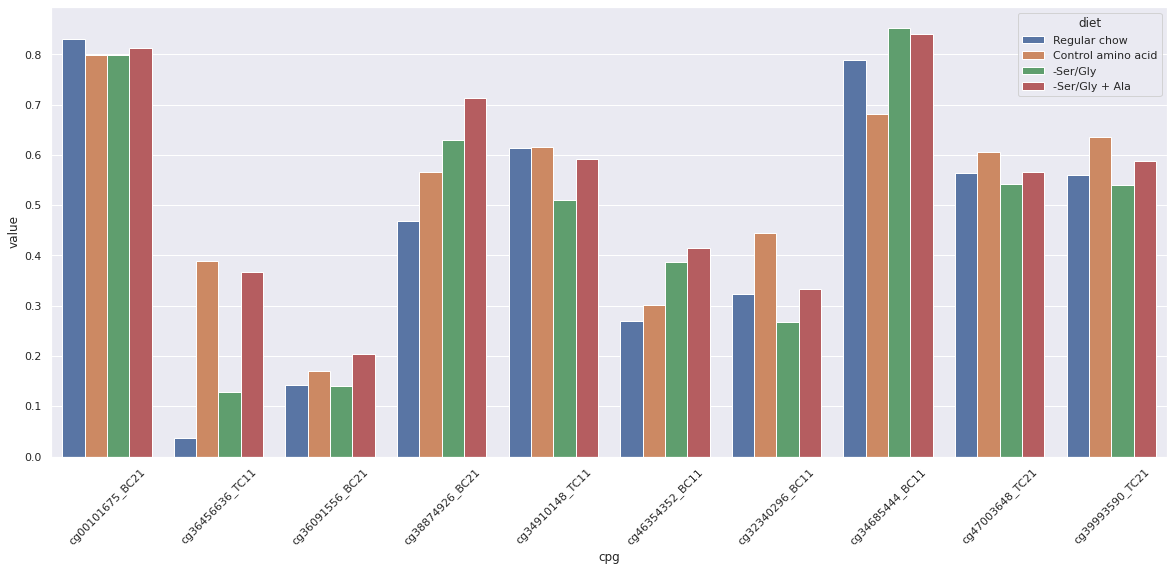

In [100]:
plt.figure()
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(data=final_df, x="cpg", y="value", hue="diet")
plt.xticks(rotation=45)

### Pre=processing

In [4]:
!cp /cellar/users/zkoch/metallo_proj/scripts/metabolic_mouse_epi_analysis.ipynb

metabolic_mouse_epi_analysis.ipynb


In [2]:
data = pd.read_csv('/cellar/users/zkoch/metallo_proj/processed_data/beta_values.tsv', sep = '\t')

In [3]:
meta = pd.read_excel('metadata.xlsx')

In [4]:
meta = meta[17:]
new_header = meta.iloc[0] #grab the first row for the header
meta = meta[1:] #take the data less the header row
meta.columns = new_header #set the header row as the df header

In [5]:
data = data.transpose()
new_header = data.iloc[0] #grab the first row for the header
data = data[1:] #take the data less the header row
data.columns = new_header #set the header row as the df header

In [6]:
meta = meta.reset_index(drop=True)
meta['Sample Name'] = meta['Sample Name'].astype('str')
meta['Sample Name'] = meta['Sample Name'].replace(' ','_', regex=True)
meta = meta.set_index('Sample Name')

In [7]:
to_join_meta = pd.read_csv('CorrectedSampleSheet.csv')
to_join_meta = to_join_meta.set_index('Sample_Name')

In [8]:
meta = meta.merge(to_join_meta, how='outer', left_index=True, right_index=True)

In [74]:
# data['sentrix'] = data.index
# data['sentrix'][0][-6:]
# strip_sentrix = []
# for i in data['sentrix']:
#     strip_sentrix.append(i[-6:])

In [9]:
data['age']= list(meta['Age (months)'])
data['diet'] = list(meta['Diet '])
data['background'] = list(meta['Genetic background'])
data = data.dropna(axis = 1)

## Regular Clocks

### Random iterative shuffling/test splits

In [51]:
random_linreg_scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = (np.corrcoef(y_test, y_pred)[1][0])
    random_linreg_scores.append(acc)
    
with open('random_linreg_scores.pkl', 'wb') as f:
    pickle.dump(random_linreg_scores, f)

<AxesSubplot:ylabel='Count'>

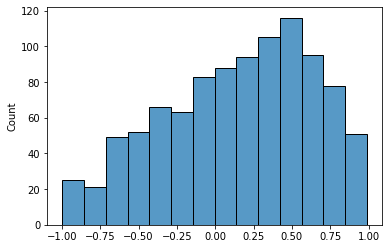

In [58]:
sns.histplot(random_linreg_scores)

In [59]:
random_elas_scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=None)
    model = ElasticNet()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = (np.corrcoef(y_test, y_pred)[1][0])
    random_elas_scores.append(acc)
    
with open('random_elas_scores.pkl', 'wb') as f:
    pickle.dump(random_elas_scores, f)

<AxesSubplot:ylabel='Count'>

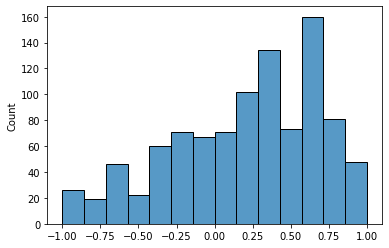

In [60]:
sns.histplot(random_elas_scores)

### Linear and Elastic Clocks

In [25]:
#Linear
X = data.drop(['diet','age', 'background'], axis =1).values
y = data['age'].values
score_list = []
mean_SE = []

outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
for train_indices, test_indices in outer_cv.split(X):
    X_train, X_test = X[train_indices, :], X[test_indices, :]
    y_train, y_test = y[train_indices], y[test_indices]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = (np.corrcoef(y_test, y_pred)[1][0])
    score_list.append(acc)
    mean_SE.append(mean_squared_error(y_test, y_pred))
    print(acc, mean_squared_error(y_test, y_pred))
    
print(mean(acc), mean(mean_SE))

-0.32634387091449885 57.48096119016829
-0.11019266956382755 69.28500622716919
0.21507547875178276 23.712102652017172
-0.4066266534524842 93.23240348692418
0.4147476285412144 44.272038436391405
0.4147476285412144 57.59650239853405


In [28]:
#Elastic
X = data.drop(['diet','age', 'background'], axis =1).values
y = data['age'].values
score_list = []
mean_SE = []

outer_cv = KFold(n_splits = 5, shuffle = True, random_state = 0)
for train_indices, test_indices in outer_cv.split(X):
    X_train, X_test = X[train_indices, :], X[test_indices, :]
    y_train, y_test = y[train_indices], y[test_indices]

    model = ElasticNetCV(random_state = 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = (np.corrcoef(y_test, y_pred)[1][0])
    score_list.append(acc)
    mean_SE.append(mean_squared_error(y_test, y_pred))
    print(acc, mean_squared_error(y_test, y_pred))
    
print(mean(acc), mean(mean_SE))

-0.31074506106548627 41.06286672383908
0.15789469011894489 53.66339348398113
1.6127885670753182e-16 23.26398891966759
0.1039237610397303 66.37351193074441
nan 52.49375410913873
nan 47.37150303347419


### Disease Testing

In [65]:
control_test = data[data['background'] == 'WT (C57BL/6J)']
disease_test = data[data['background'] == 'PolgAD257A']

In [66]:
disease_train = data[data['background'] != 'WT (C57BL/6J)']
disease_train = data[data['background'] != 'PolgAD257A']

In [83]:
# X = disease_train.drop(['diet','age', 'background'], axis =1).values
# y = disease_train['age'].values

disease_test_x = disease_test.drop(['diet','age', 'background'], axis =1).values
disease_test_y = disease_test['age'].values

# model = ElasticNetCV(random_state = 0)
# model.fit(X, y)
y_pred = model.predict(disease_test_x)
acc = (np.corrcoef(disease_test_y, y_pred)[1][0])
print(acc)
print(mean_squared_error(disease_test_y, y_pred))

nan
23.558001189768014


In [84]:
y_pred

array([16.85365854, 16.85365854, 16.85365854, 16.85365854, 16.85365854,
       16.85365854, 16.85365854])

In [85]:
control_test_x = control_test.drop(['diet','age', 'background'], axis =1).values
control_test_y = control_test['age'].values

y_pred = model.predict(control_test_x)
acc = (np.corrcoef(control_test_y, y_pred)[1][0])
print(acc)
print(mean_squared_error(control_test_y, y_pred))

nan
23.55800118976801


In [86]:
y_pred

array([16.85365854, 16.85365854, 16.85365854, 16.85365854, 16.85365854,
       16.85365854, 16.85365854, 16.85365854])

### Diet testing

In [98]:
X = data.drop(['diet','age', 'background'], axis =1).values
y = data['age'].values
model = ElasticNet()
model.fit(X, y)
y_pred = model.predict(X)
acc = (np.corrcoef(y, y_pred)[1][0])
print(acc)

0.3080595212766926


In [102]:
diet_results = pd.DataFrame({'Chronological' : y , 'Predicted': y_pred, 'Diet': data['diet']})

<AxesSubplot:xlabel='Chronological', ylabel='Predicted'>

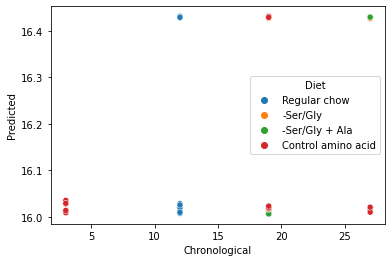

In [103]:
sns.scatterplot(data=diet_results, x="Chronological", y="Predicted", hue = 'Diet')